# **Predict students' performance (grades) in Portuguese and Math by building a neural network with Tensorflow**

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 103.4215 - val_loss: 19.6330
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.6761 - val_loss: 10.2937
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.8754 - val_loss: 9.9925
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1973 - val_loss: 7.0593
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.6888 - val_loss: 7.0962
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7120 - val_loss: 6.3698
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2171 - val_loss: 6.7210
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9798 - val_loss: 5.9995
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7892 - val_loss: 6.0186
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6587 - val_loss: 5.7451
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Portuguese Course Evaluation Metrics
Mean Squared Error: 8.132538531185878
Mean Absolute Error: 2.101376053003

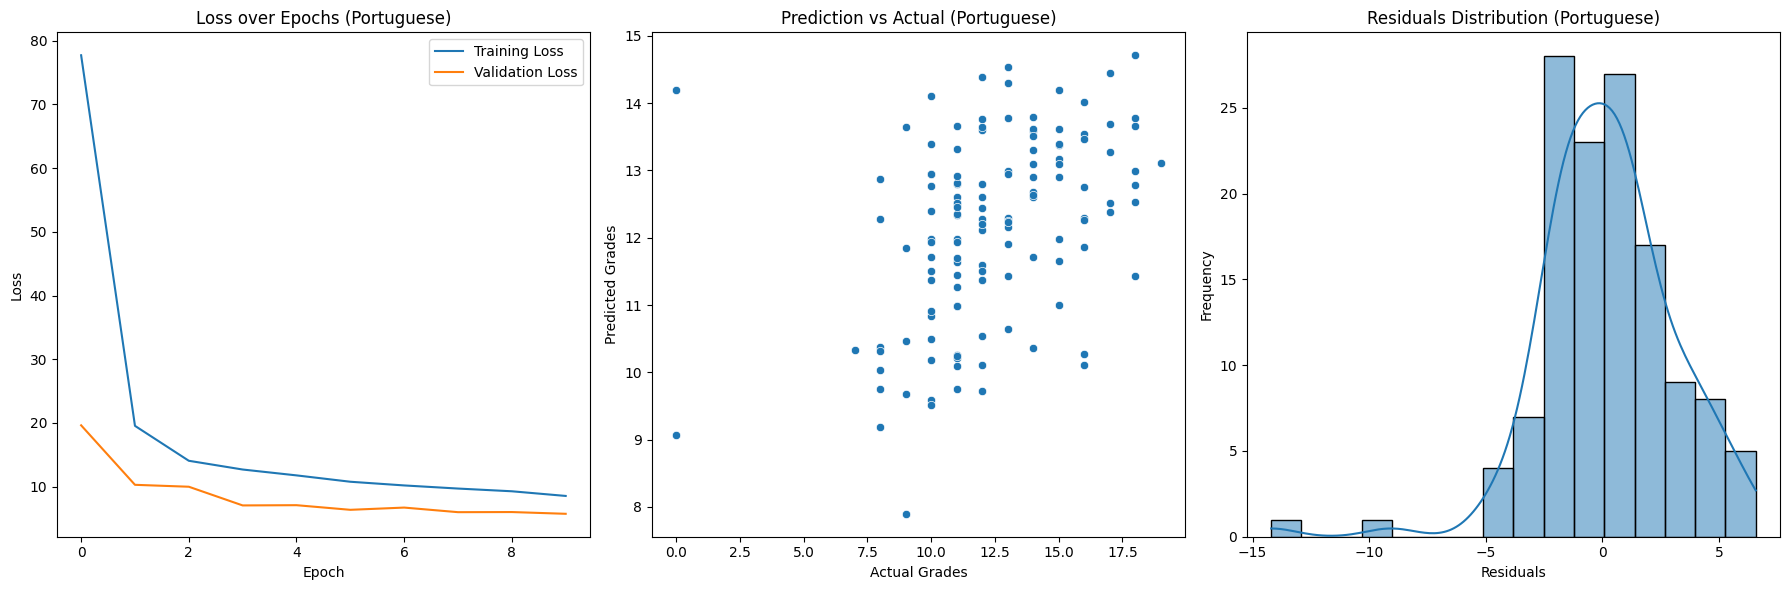

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 151.9668 - val_loss: 95.0652
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.6334 - val_loss: 52.4620
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.1490 - val_loss: 20.5834
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.5491 - val_loss: 21.7879
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.7135 - val_loss: 18.2045
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.4434 - val_loss: 18.9873
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.9589 - val_loss: 18.1318
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1513 - val_loss: 17.2984
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6699 - val_loss: 17.1256
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6849 - val_loss: 16.9899
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Math Course Evaluation Metrics
Mean Squared Error: 21.410872956523995
Mean Absolute Error: 3.7693599507778504
R2 Score:

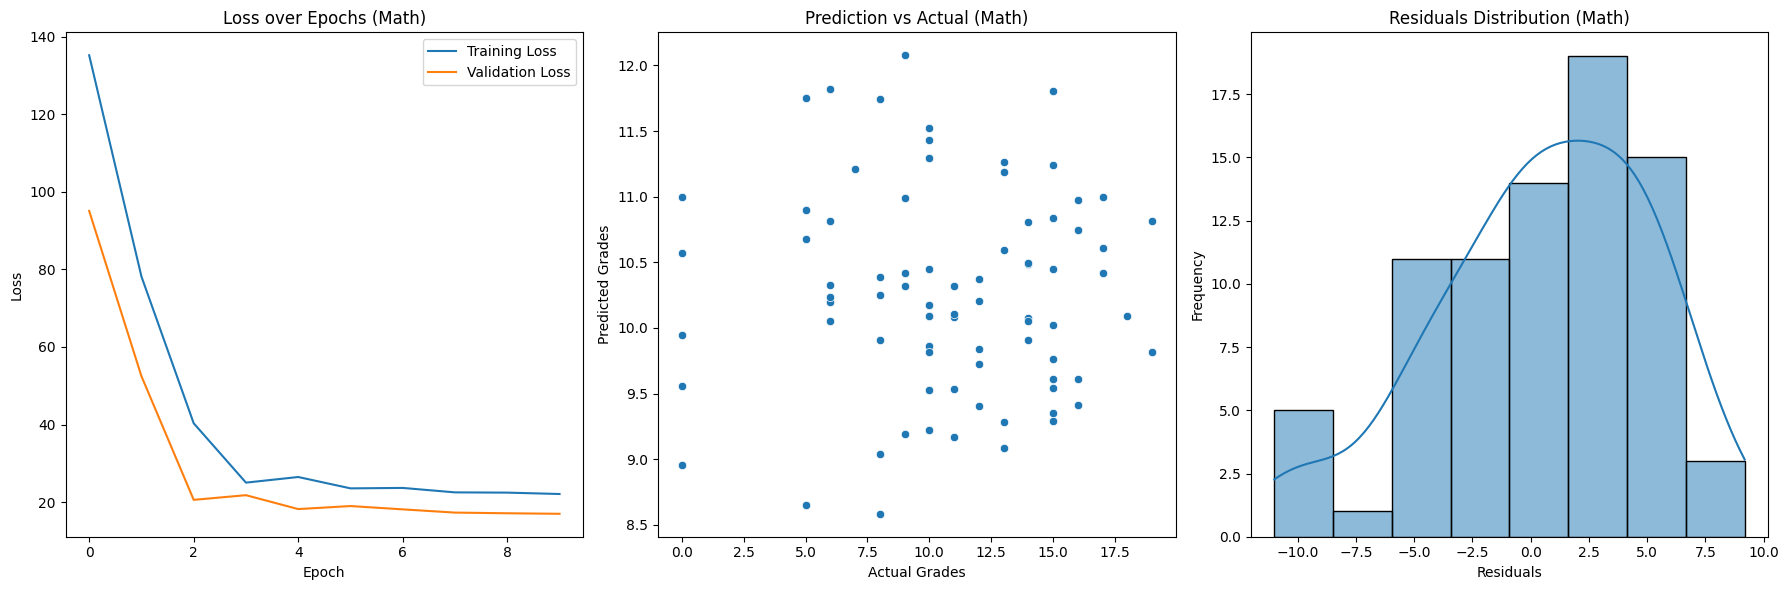

In [44]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')

# Importing the dataset
data_por = pd.read_csv('student-por.csv')
data_mat = pd.read_csv('student-mat.csv')

# The model will predict a final grade
y_por = data_por['G3']
y_mat = data_mat['G3']

# Columns with grades are dropped
data_por = data_por.drop(['G1', 'G2', 'G3'], axis=1)
data_mat = data_mat.drop(['G1', 'G2', 'G3'], axis=1)

# Splitting the dataset in train and test parts
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_por, y_por, test_size=0.2, random_state=42)

# Scaling the only continuous variable in a dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['absences'] = scaler.fit_transform(X_train[['absences']])
X_test['absences'] = scaler.transform(X_test[['absences']])

# One-hot encoding categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the same columns in train and test data
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_por = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model
y_pred_por = model.predict(X_test).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Portuguese Course Evaluation Metrics")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_por))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_por))
print("R2 Score:", r2_score(y_test, y_pred_por))

# Compare real values to predicted
df_por = pd.DataFrame({'y_test': y_test.values, 'y_pred': y_pred_por})
print(df_por.round(2).head(10))

# Visualizations for Portuguese Course
plt.figure(figsize=(18, 6))

# Loss over epochs
plt.subplot(1, 3, 1)
plt.plot(history_por.history['loss'], label='Training Loss')
plt.plot(history_por.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs (Portuguese)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Prediction vs Actual
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_por['y_test'], y=df_por['y_pred'])
plt.title('Prediction vs Actual (Portuguese)')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')

# Residuals
plt.subplot(1, 3, 3)
residuals_por = df_por['y_test'] - df_por['y_pred']
sns.histplot(residuals_por, kde=True)
plt.title('Residuals Distribution (Portuguese)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Repeat similar steps for the Math course
X_train, X_test, y_train, y_test = train_test_split(data_mat, y_mat, test_size=0.2, random_state=42)

# Scaling the only continuous variable in a dataset
X_train['absences'] = scaler.fit_transform(X_train[['absences']])
X_test['absences'] = scaler.transform(X_test[['absences']])

# One-hot encoding categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the same columns in train and test data
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Create the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_mat = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model
y_pred_mat = model.predict(X_test).flatten()

print("Math Course Evaluation Metrics")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_mat))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_mat))
print("R2 Score:", r2_score(y_test, y_pred_mat))

# Compare real values to predicted
df_mat = pd.DataFrame({'y_test': y_test.values, 'y_pred': y_pred_mat})
print(df_mat.round(2).head(10))

# Visualizations for Math Course
plt.figure(figsize=(18, 6))

# Loss over epochs
plt.subplot(1, 3, 1)
plt.plot(history_mat.history['loss'], label='Training Loss')
plt.plot(history_mat.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs (Math)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Prediction vs Actual
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_mat['y_test'], y=df_mat['y_pred'])
plt.title('Prediction vs Actual (Math)')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')

# Residuals
plt.subplot(1, 3, 3)
residuals_mat = df_mat['y_test'] - df_mat['y_pred']
sns.histplot(residuals_mat, kde=True)
plt.title('Residuals Distribution (Math)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
